In [1]:
import sys
import os
sys.path.append("../")
os.chdir("../")
from src.parserutils import get_parser
from src.utils import Explorer

# [XAI Tutorial 01] MNIST / CIFAR10

<span style="color:red">**[Warning]**</span> This article is collection of some good articles that i read, so it contains a lot of references. Please visit them to learn more about XAI.

## Contents

1. [XAI](#1.-XAI)
2. [Interpretability](#2.-Interpretability)
    - What is Interpretability
    - Why Interpretability
    - Types of Interpretability
3. [Deep Neural Network Interpretability](#3.-Deep-Neural-Network-Interpretability)
    - Interpreting Models
        - Representation Analysis
        - Data Generation
        - Example-based
    - Interpreting Descions
        - Example-based
        - Attribution Methods
4. [Evaluation of Attribution Methods](#4.-Evaluation-of-Attribution-Methods)
    - Qualitative
        - Coherence
        - Class Sensitivity
    - Quantitative
        - Selectivity
        - ROAR / KAR
5. [Evaluation with MNIST & CIFAR10](#5.-Evaluation-with-MNIST-&-CIFAR10)


---

## References

* 1-1: [Wikipedia: Explainable_artificial_intelligence](https://en.wikipedia.org/wiki/Explainable_artificial_intelligence)
* 2-1: [Explanation in Artificial Intelligence: Insights from the Social Sciences](https://arxiv.org/abs/1706.07269)
* 2-2: [Explaining Explanations: An Overview of Interpretability of Machine Learning](https://arxiv.org/abs/1806.00069)
* 3-1: [A Benchmark for Interpretability Methods in Deep Neural Networks](https://arxiv.org/abs/1806.10758)

### Attribution Methods Papers:

* [Not Just a Black Box: Learning Important Features Through Propagating Activation Differences](https://arxiv.org/abs/1605.01713)
* [Striving for Simplicity: The All Convolutional Net](https://arxiv.org/abs/1412.6806)
* [Grad-CAM: Visual Explanations from Deep Networks via Gradient-based Localization](https://arxiv.org/abs/1610.02391)

## Useful Articles (To be updated)

* [Molnar, Christoph. "Interpretable machine learning. A Guide for Making Black Box Models Explainable", 2019](https://christophm.github.io/interpretable-ml-book/)
* [Explainable AI (Part I): Explanations and Opportunities](https://dainstudios.com/2019/10/24/explainable-ai-part-1/)
* [Korean Review for References 1-2](https://simonjisu.github.io/paper/2019/09/18/introxai.html)

---

## 1. XAI

> Explainable AI (XAI) refers to methods and techniques in the application of artificial intelligence technology (AI) such that the results of the solution can be understood by human experts. It contrasts with the concept of the "black box" in machine learning where even their designers cannot explain why the AI arrived at a specific decision.
> 
> From [References: 1-1](#References)

## 2. Interpretability

### What is Interpretability?

> I use [Biran and Cotton’s](https://pdfs.semanticscholar.org/02e2/e79a77d8aabc1af1900ac80ceebac20abde4.pdf) definition of **interpretability** of a model as: the degree to which an observer can understand the cause of a decision.
> 
> **From:** [References: 2-1](#References)

> **The Goal of Interpretability**
>
> The goal of interpretability is to describe the internals of a system in a way that is understandable to humans. The success of this goal is tied to the cognition, knowledge, and biases of the user: for a system to be interpretable, it must produce descriptions that are simple enough for a person to understand using a vocabulary that is meaningful to the user.
> 
> **What is an Explanation?**
>
> Philosophical texts show much debate over what constitutes an explanation. Of particular interest is what makes an explanation “good enough” or what really defines an explanation. Some say a good explanation depends on the question. This set of essays discusses the nature of explanation, theory, and the foundations of linguistics. Although for our work, the most important and interesting work is on “Why questions.” In particular, when you can phrase what you want to know from an algorithm as a why question, there is a natural qualitative representation of when you have answered said question–when you can no longer keep asking why. There are two why questions of interest; why and why-should. Similarly to the explainable planning literature, philosophers wonder about the why-shouldn’t and why-should questions, which can give the kinds of explainability requirements we want. 
> 
> **From:** [References: 2-2](#References)

### Why Interpretability?

> 1. Verify that model works as expected
>     * Wrong decisions can be costly and dangerous: [Self-driving Uber kills Arizona woman in first fatal crash involving pedestrian](https://www.theguardian.com/technology/2018/mar/19/uber-self-driving-car-kills-woman-arizona-tempe) / Disease Misclassification
> 2. Improve / Debug classifier
> 3. Make new discoveries: 
    * Learn about the physical / biological / chemical mechanisms
    * Learn about the human brain
> 4. Right to explanation
>     * US Equal Credit Opportunity Act
>     * The European Union General Data Protection Regulation
>     * France Digital Republic Act
> 
> **From:** Taegyun Jeon(SIA, Founder and Chief Executive Office) in the lecture of AICollege (Not for Share)

### Types of Interpretability in ML

> * Ante-hoc Interpretability: Choose an interpretable model and train it.
>     * Example: Decision Tree
>     * Problem: Is the model expressive enough to predict the data?
> * Post-hoc Interpretability: Choose a complex model and develop a special technique to interpret it.
>     * Deep Neural Networks
>     * How to interpret millions of parameters?
> 
> **From:** The lecture of Taegyun Jeon(SIA, Founder and Chief Executive Office) in AICollege (Not for Share)

---

## 3. Deep Neural Network Interpretability

### Interpreting Models(Macroscopic)
> Better understand internal representations
> * "Summarize" DNN with a simpler model (e.g. decision tree) 
> * Find prototypical example of a category
> * Find pattern maximizing activation of a neuron
>
> Types of Interpretability
> * Representation Analysis
> * Data Generation
> * Example-based
> 
> **From:** The lecture of Taegyun Jeon(SIA, Founder and Chief Executive Office) in AICollege (Not for Share)

### Interpreting Descions(Microscopic)
> Important for practical applications
> - Why did DNN make this decision?
> - Verify that model behaves as expected - Find evidence for decision
> 
> Types of Interpretability
> * Example-based
> * Attribution Methods
> 
> **From:** The lecture of Taegyun Jeon(SIA, Founder and Chief Executive Office) in AICollege (Not for Share)

---

## 4. Evaluation of Attribution Methods

### Qualitative
- Coherence
- Class Sensitivity

### Quantitative
- Selectivity
    > Process:
    > 1. Evaluation with attribution method and get the attribution scores for the input datas. 
    > 2. Ranking the attribution scores and replace the input datas to 0 according to the ranked attribution scores with the percentage. Call them as "perturbed datas"
    > 3. Ust the "perturbed datas" as a new input datas for model.
    > 4. Repeat 1-3 process for a certain steps that you set. Also, record the metrics at each step.
- ROAR / KAR
    > Process:
    > 1. Evaluation with attribution method and get the attribution scores for the input datas.
    > 2. Ranking the attribution scores, after this using a small percentage(from 10% ~ 90%)
    >     * [ROAR] replace the input datas to 0 according to the ranked attribution scores with the percentage.
    >     * [KAR] begins with a datas filled with zeros, fill original datas according to the ranked attribution scores with the percentage.
    >     * Call them as "perturbed datas"
    > 3. Ust the "perturbed datas" as a new input datas for model. 
    > 4. Retrain the model and record the metrics.

    > **What would happen without re-training?**
    >
    > The re-training is the most computationally expensive aspect of ROAR. One should question whether it is actually needed. We argue that re-training is needed because machine learning models **typically assume that the train and the test data comes from a similar distribution.**
    >
    > The replacement value c can only be considered uninformative if the model is trained to learn it as such. Without retraining, it is unclear whether degradation in performance is **due to the introduction of artifacts outside of the original training distribution** or **because we actually removed information**. This is made explicit in our experiment in Section 4.3.1, we show that without retraining the degradation is far higher than the modest decrease in performance observed with re-training. This suggests retraining has better controlled for artefacts introduced by the modification.
    >
    > **From**: [References: 3-1](#References)
    
---

## 5. Evaluation with MNIST & CIFAR10

1. Qualitative: See Attribution Maps with Mnist / Cifar10 Datas
2. Quantitative: watch test accuracy in ROAR/KAR is decreasing / increasing.

Builded a Baseline model which create a attribution map by random values from [0, 1).

* all attributions are normalized to 0 to 255.

### ROAR-MNIST

In [2]:
mnist_roar_args = get_parser(data_type="mnist", option="roar", no_attention=True)
mnist_roar_explorer = Explorer(mnist_roar_args)
mnist_roar_explorer.show()

Output()

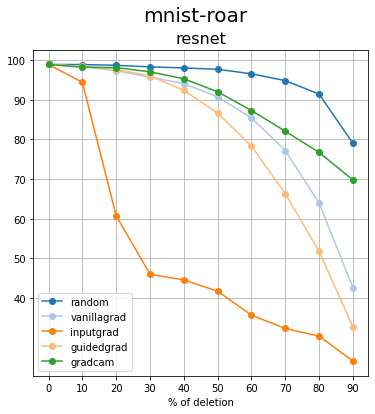

In [3]:
mnist_roar_explorer.show_eval()

### KAR-MNIST

* percent of recover at 0 means the test accuracy for model's first trained result.

In [4]:
mnist_kar_args = get_parser(data_type="mnist", option="kar", no_attention=True)
mnist_kar_explorer = Explorer(mnist_kar_args)
mnist_kar_explorer.show()

Output()

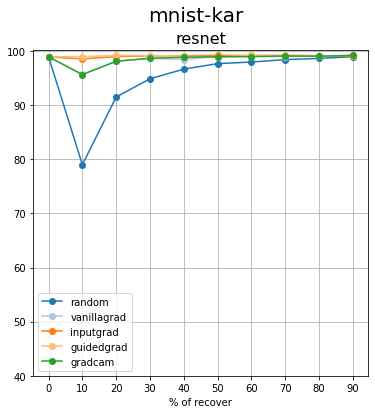

In [5]:
mnist_kar_explorer.show_eval()

### ROAR-CIFAR10

In [6]:
cifar10_roar_rcd_args = get_parser(data_type="cifar10", option="roar-rcd", no_attention=True)
cifar10_roar_rcd_explorer = Explorer(cifar10_roar_rcd_args)
cifar10_roar_rcd_explorer.show()

Files already downloaded and verified
Files already downloaded and verified


Output()

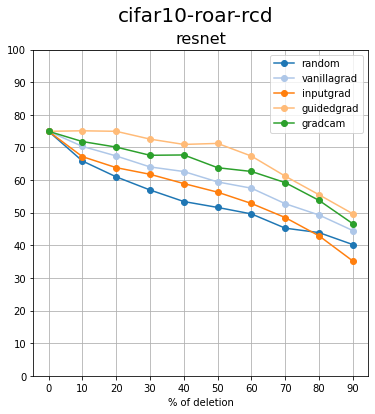

In [7]:
cifar10_roar_rcd_explorer.show_eval()

### KAR-CIFAR10

In [7]:
cifar10_kar_rcd_args = get_parser(data_type="cifar10", option="kar-rcd", no_attention=True)
cifar10_kar_rcd_explorer = Explorer(cifar10_kar_rcd_args)
cifar10_kar_rcd_explorer.show()

Files already downloaded and verified
Files already downloaded and verified


Output()

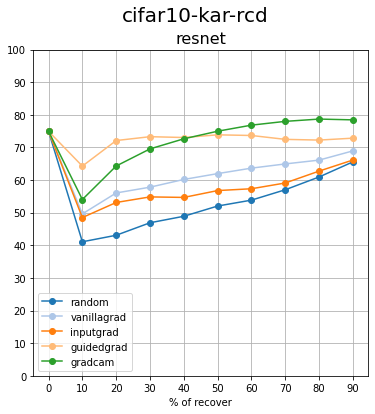

In [8]:
cifar10_kar_rcd_explorer.show_eval()

---

if you are in local jupyter notebook, open this notebook and change codes to change the option(you can't see codes through voila).

- `data_type`: `"mnist"`, `"cifar10"`
- `option`:
    * Mnist Data: `"roar"`, `"kar"`
    * Cifar10 Data: `"roar-plain"`, `"kar-rcd"`, `"roar-rcd"`, `"roar-rcd-fgm"`, `"roar-rcd-noabs"`

    > option-explanation:
    >    * `rcd`: gray scale for all attribution methods(means that recuding the color dimension to 1)
    >    * `fgm`: fill the masks with global mean of all datas instead of zeros.
    >    * `noabs`: not to absolute attribution scores in some methods
- `no_attention`: not to show the attention models

Code:

```python
args = get_parser(data_type="cifar10", option="roar-rcd", no_attention=False)
explorer = Explorer(args)
explorer.show()
```